#### Import necessary libraries

In [1]:
import wget  # For downloading the dataset
import pandas as pd  # For handling and manipulating data
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.ensemble import RandomForestRegressor  # Random Forest model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model
import matplotlib.pyplot as plt  # For visualization

#### Step 1: Download the dataset

In [2]:
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv"  # Example dataset
dataset_path = "dataset.csv"
wget.download(url, dataset_path)

'dataset.csv'

#### Step 2: Load the dataset into a pandas DataFrame

In [3]:
data = pd.read_csv(dataset_path)

# View the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Index   Height(Inches)"   "Weight(Pounds)"
0      1             65.78             112.99
1      2             71.52             136.49
2      3             69.40             153.03
3      4             68.22             142.34
4      5             67.79             144.30


#### Step 3: Data preprocessing

In [4]:
# Checking for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Rename columns for easier access
data.columns = ['Index', 'Height', 'Weight']  # Renaming for clarity
print("\nRenamed columns:")
print(data.columns)


Checking for missing values:
Index                0
 Height(Inches)"     0
 "Weight(Pounds)"    0
dtype: int64

Renamed columns:
Index(['Index', 'Height', 'Weight'], dtype='object')


#### Step 4: Define features (X) and target (y)

In [5]:
X = data[['Height']]  # Independent variable
y = data['Weight']    # Dependent variable

#### Step 5: Split the dataset into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 6: Create the Random Forest Regressor model

In [7]:
# Random Forest is an ensemble method that uses multiple decision trees
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Step 7: Make predictions

In [8]:
# Using the testing set to evaluate the model
y_pred = model.predict(X_test)

#### Step 8: Evaluate the model

In [9]:
# Mean Squared Error (MSE): Measures average error squared
mse = mean_squared_error(y_test, y_pred)

# R^2 score: Measures how well the model explains the variance in the data
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 186.96067612248356
R^2 Score: -0.17252220700183307


#### Step 9: Visualize the results

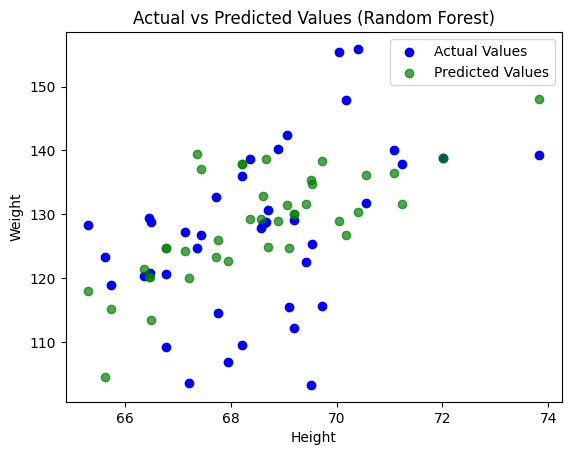

In [10]:
# Scatter plot of actual vs. predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='green', label='Predicted Values', alpha=0.7)
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

#### Save the trained model

In [11]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'.")


Model saved as 'random_forest_model.pkl'.
